In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [2]:
path_start = '/home/rabea/cedarRecordings/mental_imagery_extended_recording/'
trial_path = 'Nengo_test_2019_10_24__12_38_54_time_factor0.05/Trial_3/'
path = path_start + trial_path
files = glob.glob(path + '*.csv')

dir_name = trial_path[11:-1]
dir_name = dir_name.replace('/','_')
time_factor = dir_name.split('time_factor',1)[1].split('_',1)[0]
print(dir_name,'\n', time_factor)

2019_10_24__12_38_54_time_factor0.05_Trial_3 
 0.05


In [3]:
# files

In [4]:
def get_name(filepath):
    filename = filepath.rsplit('/',1)[1]
    name = filename.rsplit('.',2)[0].rsplit('[',1)[0]
    name = name.replace('_', ' ')
    
    return name

In [5]:
# modules_3d = ['Attention', 'Perception', 'Static Gain 3', 'Projection 5', 'Projection 11',
#               'Projection 2', 'Projection 28', 'Projection 29', 'Static Gain 20',
#               'Static Gain 41', 'Static Gain 53']
cedar_data = {}
for filepath in files:
    module_name = get_name(filepath)
    print(module_name)
    cedar_data[module_name] = pd.read_csv(filepath, skiprows=1, header=None)

Condition of  Dissatisfaction .CoS node
OC Field and Spatial Production Nodes  .intention node
Condition of  Dissatisfaction .intention node
Find the Spatial Relation
Reference Cyan Memory
Target Orange Production
Match Field.intention node
Spatial Memory Nodes.intention node
Target Blue Production
Reference Orange Memory
Spatial Memory Nodes.CoS node
Relational Behavior.CoS node
Object-centered 
Target Red Memory
Reference Behavior.CoS node
Reference Green Production
Target Red Production
Target Green Production
Reference Memory Nodes & Color Field.CoS node
Indeterminent 
Target Field & Target Production Nodes.intention node
Reference Behavior.intention node
Target Orange Memory 
Reference Green Memory
Above Memory
Relational Behavior.intention node
Reference Field & Reference Production Nodes.CoS node
Target Behavior.CoS node
Below Production
Target Cyan Memory
Reference Memory Nodes & Color Field 2.CoS node
Below Memory
Reference Memory Nodes & Color Field.intention node
Target Blue

In [6]:
for name in cedar_data:
    cedar_data[name].drop_duplicates(subset=0, keep='last', inplace=True)

In [7]:
def plot_2dneuralfield(nf_data, time_points, colorbar=False, title=None, save=False):
    times = nf_data.iloc[time_points, 0]
    data = nf_data.iloc[time_points, 1:]

    plt.figure(figsize=(11.5, 9))
    # make title
    if title is not None:
        plt.suptitle(title)
    # plot 15 points in time 
    for i, time_point in enumerate(time_points):
        plt.subplot(6,6,i+1)
        plt.imshow(np.array(data.iloc[i]).reshape(50,50, order='F'), cmap='jet')
        plt.title(times.iloc[i])
        plt.xticks([])
        plt.yticks([])
        if colorbar:
            plt.colorbar()
            
    plt.subplots_adjust(top=0.93,wspace=0.26, hspace=0.23)
    # save image 
    if save:
        if not os.path.isdir('../../images/%s' %dir_name):
            os.mkdir('../../images/%s' %dir_name)
        plt.savefig('../../images/%s/%s_%s.png' %(dir_name, title, time_factor))
    plt.show()
    
def plot_1dneuralfield(nf_data, time_points, title=None, save=False):
    times = nf_data.iloc[time_points, 0]
    data = nf_data.iloc[time_points, 1:]
    min = np.min(np.min(nf_data.iloc[:, 1:]))
    max = np.max(np.max(nf_data.iloc[:, 1:]))
    plt.figure(figsize=(13,10))
    dif = max-min
    # make title
    if title is not None: 
         plt.suptitle(title)
    for i, tp in enumerate(time_points):
        plt.subplot(6,6,i+1)
        plt.title(times.iloc[i])
        plt.plot(data.iloc[i])
        plt.ylim(min-0.1*dif, max+0.1*dif)
        
#     plt.tight_layout(rect=(0,0,1,0.96))
    plt.subplots_adjust(top=0.93, hspace=0.5, wspace=0.3)
    # save image
    if save:
        if not os.path.isdir('../../images/%s' %dir_name):
            os.mkdir('../../images/%s' %dir_name)
        plt.savefig('../../images/%s/%s_%s.png' %(dir_name, title, time_factor))
    plt.show()

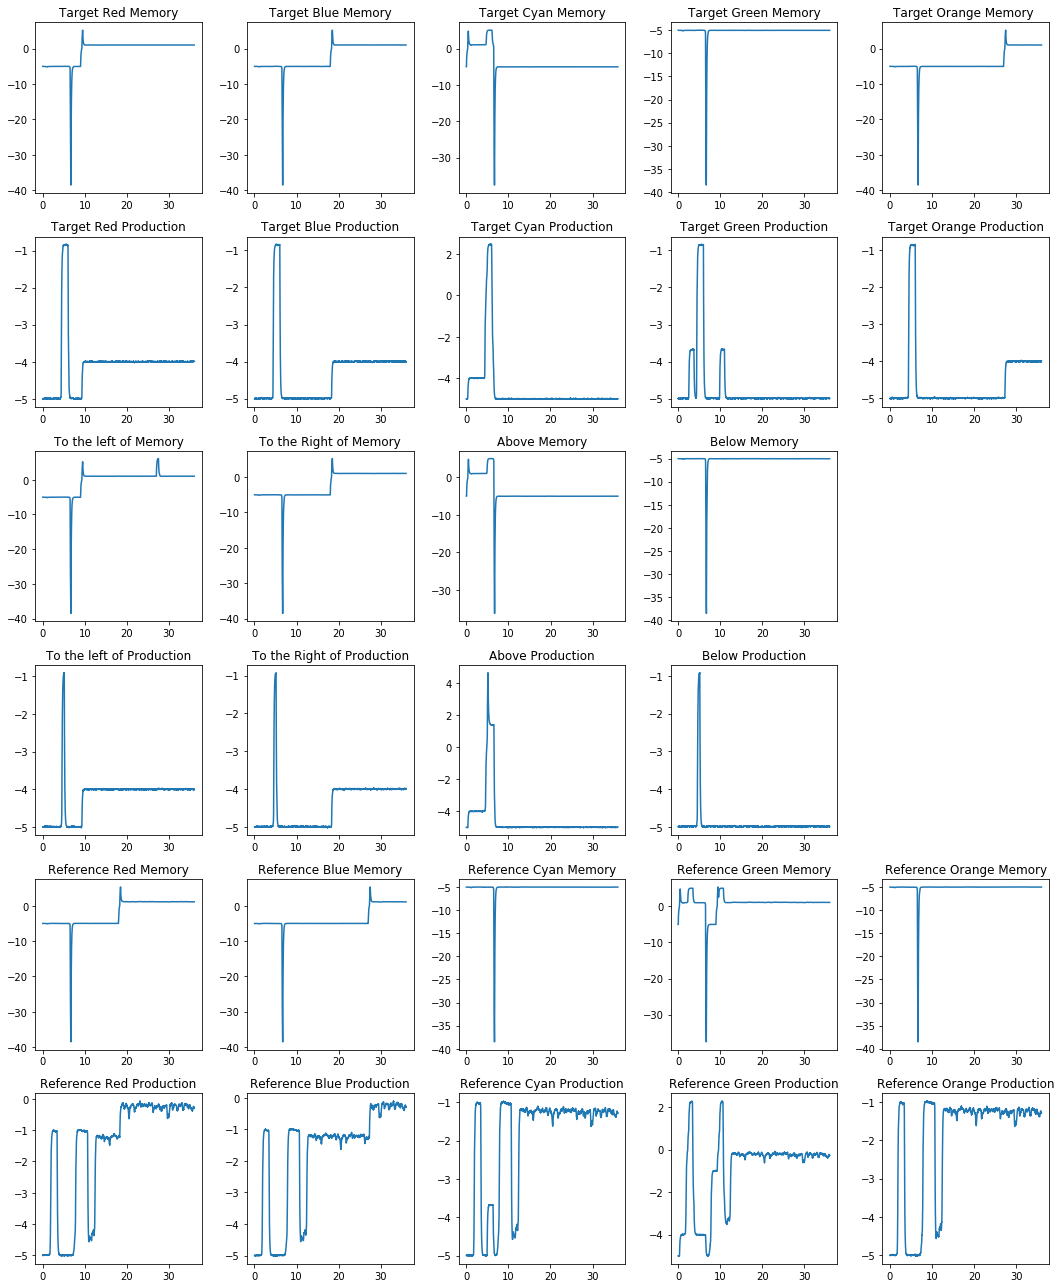

In [8]:
plot_1d = ['Target Red Memory', 'Target Blue Memory', 'Target Cyan Memory', 
           'Target Green Memory', 'Target Orange Memory ', 'Target Red Production', 
           'Target Blue Production', 'Target Cyan Production', 'Target Green Production', 
           'Target Orange Production', 'To the left of Memory', 'To the Right of Memory',
           'Above Memory', 'Below Memory', 'Empty','To the left of Production', 
           'To the Right of Production', 'Above Production', 'Below Production', 'Empty',
           'Reference Red Memory', 'Reference Blue Memory', 'Reference Cyan Memory', 
           'Reference Green Memory', 'Reference Orange Memory',
           'Reference Red Production', 'Reference Blue Production', 
           'Reference Cyan Production', 'Reference Green Production', 
           'Reference Orange Production']

plt.figure(figsize=(15,18))
for i, name in enumerate(plot_1d):
    if name == 'Empty':
        continue
    plt.subplot(6,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
if not os.path.isdir('../../images/%s' %dir_name):
    os.mkdir('../../images/%s' %dir_name)
plt.savefig('../../images/%s/Memory and Production Nodes_%s.png' %(dir_name, time_factor))
plt.show()


## 1-dimensional color field from Plot Widget


(14401, 51)


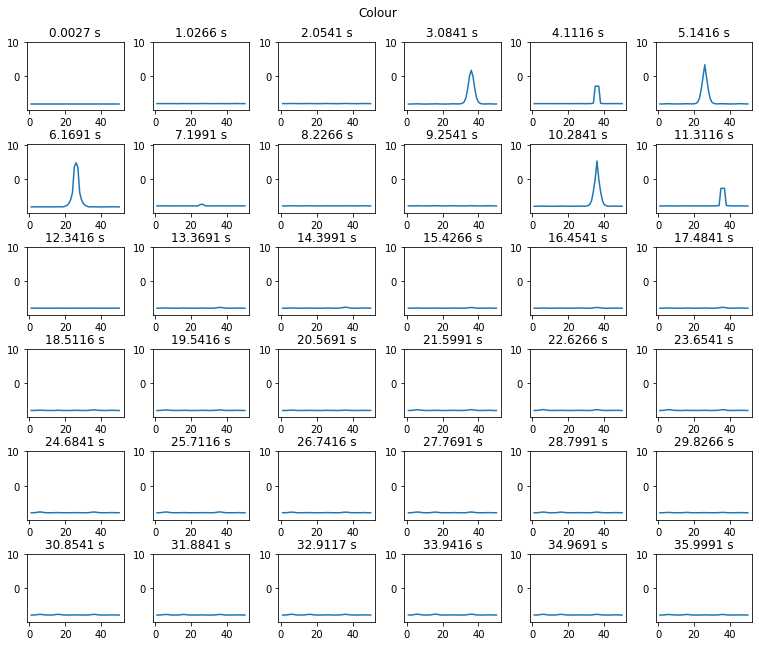

In [9]:
time_points = np.linspace(0,cedar_data['Colour'].shape[0]-1,36)
print(cedar_data['Colour'].shape)
plot_1dneuralfield(cedar_data['Colour'],time_points, 'Colour', True)

## Spatial scene

(14401, 2501)


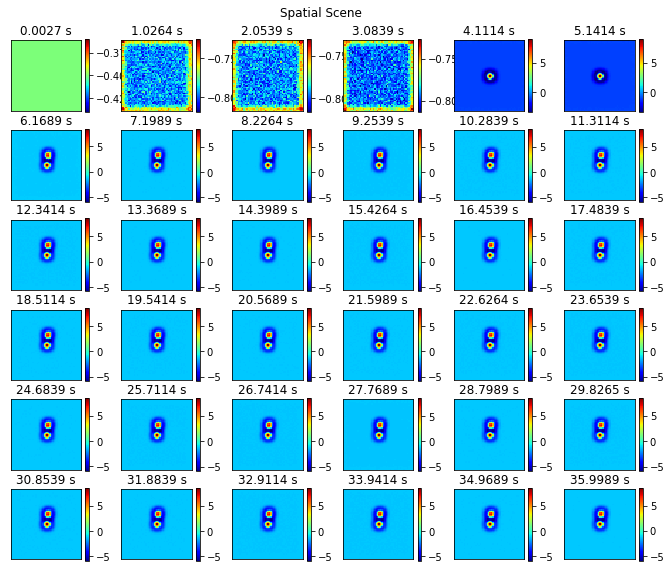

In [10]:
time_points = np.linspace(0,cedar_data['Indeterminent '].shape[0]-1,36)
print(cedar_data['Indeterminent '].shape)
plot_2dneuralfield(cedar_data['Indeterminent '], time_points, True, 'Spatial Scene', True)

## Object-centered and its sources

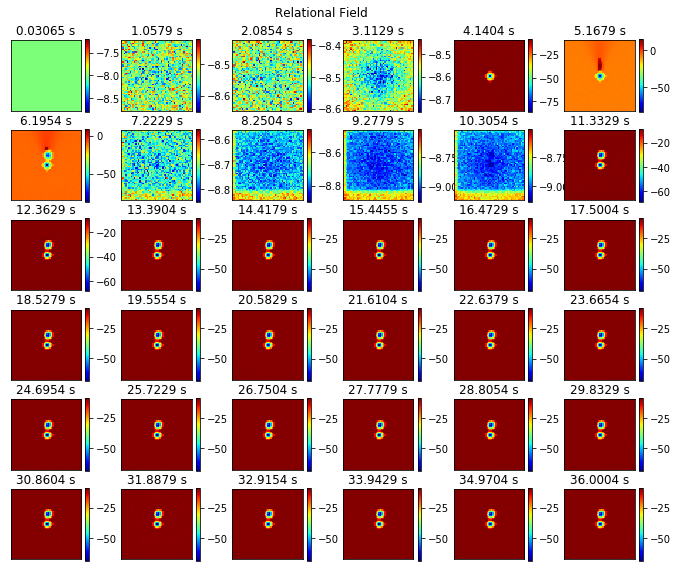

In [11]:
time_points = np.linspace(0,cedar_data['Object-centered '].shape[0]-1,36)
plot_2dneuralfield(cedar_data['Object-centered '], time_points, True, 
                   'Relational Field', True)

## Target

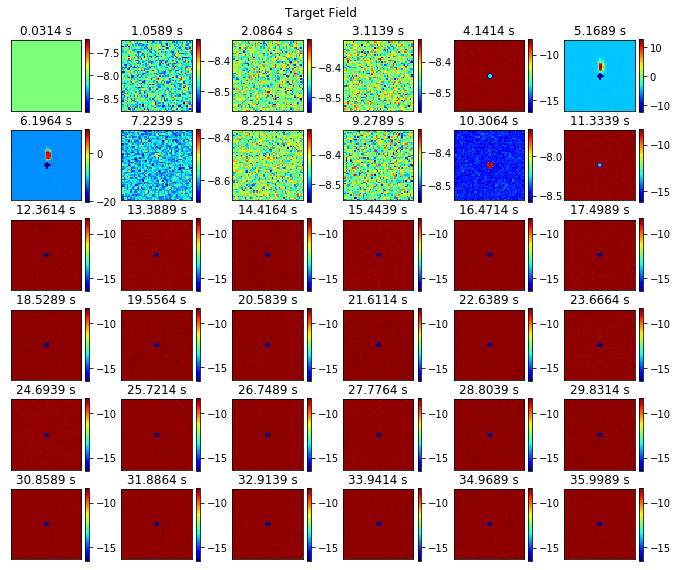

In [12]:
time_points = np.linspace(0,cedar_data['Target'].shape[0]-1,36)
plot_2dneuralfield(cedar_data['Target'], time_points, True, 'Target Field', True)

## Reference

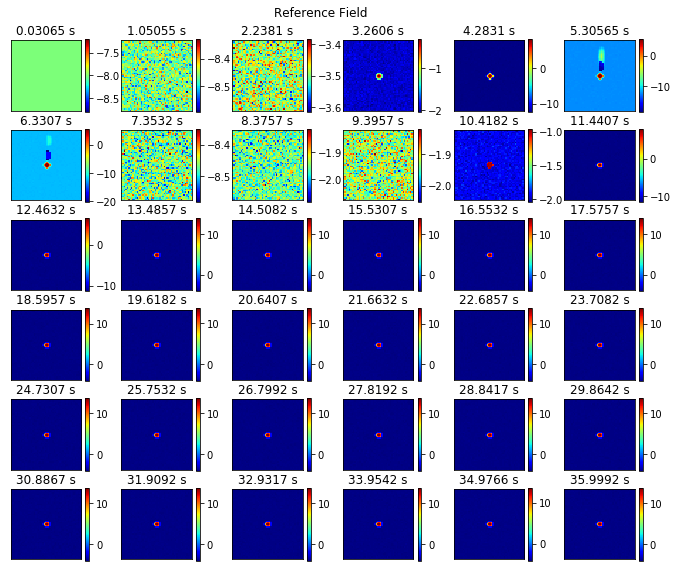

In [13]:
time_points = np.linspace(0,cedar_data['Reference'].shape[0]-1,36)
plot_2dneuralfield(cedar_data['Reference'], time_points, True, 'Reference Field', True)

## Group Target Behavior

In [14]:
# target_behavior_nodes = ['Target Behavior.intention node',
#            'Target Behavior.new StaticGain 6', 'Target Behavior.new Static Gain 4',
#            'Target Behavior.new Static Gain 12', 'Target Behavior.new Static Gain 15',
#            'Target Behavior.new Static Gain 25', 'Target Behavior.new Static Gain 26',
#            'Target Behavior.new Static Gain 27', 'Target Behavior.new StaticGain 2',
#            'Target Behavior.CoS node', 'Target Behavior.new Static Gain 5', 
#             'Target Behavior.new Static Gain 18']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(target_behavior_nodes):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()


## Group Reference Behavior

In [15]:
# ref_behavior_nodes = ['Reference Behavior.intention node', 'Reference Behavior.new Static Gain 10',
#                      'Reference Behavior.new StaticGain 6', 'Reference Behavior.new Static Gain 19',
#                      'Reference Behavior.new Static Gain 20', 'Reference Behavior.new Static Gain 31',
#                      'Reference Behavior.new Static Gain 21', 'Reference Behavior.new StaticGain 2',
#                      'Reference Behavior.CoS node', 'Reference Behavior.new Static Gain 5',
#                      'Reference Behavior.new Static Gain 16']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(ref_behavior_nodes):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Target Field & Target Production Nodes

In [16]:
# group_names = ['Target Field & Target Production Nodes.new StaticGain 6',
#                'Target Field & Target Production Nodes.new StaticGain 2',
#               'Target Field & Target Production Nodes.intention node',
#               'Target Field & Target Production Nodes.Static Gain 47',
#               'Target Field & Target Production Nodes.Projection 12',
#               'Target Field & Target Production Nodes.Static Gain 22',
#               'Target Field & Target Production Nodes.CoS node',
#               'Target Field & Target Production Nodes.Static Gain 40',
#               'Target Field & Target Production Nodes.Boost Target',
#               'Target Field & Target Production Nodes.Static Gain 39',
#               'Target Field & Target Production Nodes.Static Gain 46',
#               'Target Field & Target Production Nodes.new Static Gain 2']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(group_names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Reference Field & Reference Production Nodes

In [17]:
# names = ['Reference Field & Reference Production Nodes.new StaticGain 6',
#         'Reference Field & Reference Production Nodes.new StaticGain 2',
#         'Reference Field & Reference Production Nodes.intention node',
#         'Reference Field & Reference Production Nodes.Static Gain 47',
#         'Reference Field & Reference Production Nodes.Projection 12',
#         'Reference Field & Reference Production Nodes.Static Gain 22',
#         'Reference Field & Reference Production Nodes.CoS node',
#         'Reference Field & Reference Production Nodes.Static Gain 40',
#         'Reference Field & Reference Production Nodes.Boost Reference',
#         'Reference Field & Reference Production Nodes.Static Gain 39',
#         'Reference Field & Reference Production Nodes.Static Gain 46',
#         'Reference Field & Reference Production Nodes.new Static Gain 2']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Relational Behavior

In [18]:
# names = ['Relational Behavior.new StaticGain 6',
#         'Relational Behavior.new Static Gain 3',
#         'Relational Behavior.new Static Gain 11',
#         'Relational Behavior.new Static Gain 22',
#         'Relational Behavior.new Static Gain 23',
#         'Relational Behavior.new Static Gain 24',
#         'Relational Behavior.new Static Gain 37',
#         'Relational Behavior.new StaticGain 2',
#         'Relational Behavior.intention node',
#         'Relational Behavior.CoS node',
#         'Relational Behavior.new Static Gain 5']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group OC Field and Spatial Production Nodes

In [19]:
# names = ['OC Field and Spatial Production Nodes  .new StaticGain 6',
#          'OC Field and Spatial Production Nodes  .new StaticGain 2',
#          'OC Field and Spatial Production Nodes  .intention node',
#          'OC Field and Spatial Production Nodes  .Static Gain 51',
#          'OC Field and Spatial Production Nodes  .Projection 27',
#          'OC Field and Spatial Production Nodes  .Static Gain 52',
#          'OC Field and Spatial Production Nodes  .CoS node',
#          'OC Field and Spatial Production Nodes  .new Static Gain 6',
#          'OC Field and Spatial Production Nodes  .Static Gain 50',
#          'OC Field and Spatial Production Nodes  .Static Gain 48',
#          'OC Field and Spatial Production Nodes  .Boost OCF',
#          'OC Field and Spatial Production Nodes  .Static Gain 49']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Condition of Dissatisfaction

In [20]:
# names = ['Condition of  Dissatisfaction .new StaticGain 6', 'Condition of  Dissatisfaction .new StaticGain 2',
#          'Condition of  Dissatisfaction .intention node', 'Condition of  Dissatisfaction .Static Gain 40',
#          'Condition of  Dissatisfaction .node', 'Condition of  Dissatisfaction .Static Gain 37',
#          'Condition of  Dissatisfaction .CoS node', 'Condition of  Dissatisfaction .Static Gain 34']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Spatial Memory Nodes

In [21]:
# names = ['Spatial Memory Nodes.new StaticGain 6', 'Spatial Memory Nodes.new StaticGain 2',
#          'Spatial Memory Nodes.intention node', 'Spatial Memory Nodes.Static Gain 47',
#          'Spatial Memory Nodes.CoS node', 'Spatial Memory Nodes.Static Gain 40']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Reference Memory Nodes & Color Field

In [22]:
# names = ['Reference Memory Nodes & Color Field.new StaticGain 6',
#          'Reference Memory Nodes & Color Field.new StaticGain 2',
#          'Reference Memory Nodes & Color Field.intention node',
#          'Reference Memory Nodes & Color Field.Projection 15',
#          'Reference Memory Nodes & Color Field.Static Gain 60',
#          'Reference Memory Nodes & Color Field.CoS node',
#          'Reference Memory Nodes & Color Field.Static Gain 40',
#          'Reference Memory Nodes & Color Field.Static Gain 59',
#          'Reference Memory Nodes & Color Field.Boost Color Field',
#          'Reference Memory Nodes & Color Field.Static Gain 58']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Reference Memory Nodes & Color Field 2

In [23]:
# names = ['Reference Memory Nodes & Color Field 2.new StaticGain 6',
#          'Reference Memory Nodes & Color Field 2.new StaticGain 2',
#          'Reference Memory Nodes & Color Field 2.intention node',
#          'Reference Memory Nodes & Color Field 2.Projection 15',
#          'Reference Memory Nodes & Color Field 2.Static Gain 60',
#          'Reference Memory Nodes & Color Field 2.CoS node',
#          'Reference Memory Nodes & Color Field 2.Static Gain 40',
#          'Reference Memory Nodes & Color Field 2.Static Gain 59',
#          'Reference Memory Nodes & Color Field 2.Boost Color Field',
#          'Reference Memory Nodes & Color Field 2.Static Gain 58']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()

## Group Match Field

In [24]:
# names = ['Match Field.new StaticGain 6', 'Match Field.new StaticGain 2', 
#          'Match Field.intention node', 'Match Field.Static Gain 47', 'Match Field.Projection 12',
#          'Match Field.Static Gain 22', 'Match Field.CoS node', 'Match Field.Static Gain 40',
#          'Match Field.Boost Match Field', 'Match Field.Static Gain 39', 'Match Field.new Static Gain 2']

# plt.figure(figsize=(15,12))
# for i, name in enumerate(names):
#     plt.subplot(4,5,i+1)
    
#     x = cedar_data[name][0]
#     x = [float(t.rsplit(' ', 1)[0]) for t in x]
#     plt.plot(x, cedar_data[name][1])
#     name_split = name.rsplit('.',1)
#     if len(name_split) > 1:
#         plt.title(name_split[1])
#     else:
#         plt.title(name)

# plt.tight_layout()
# plt.show()